In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import matplotlib.pyplot as plt

## 1- Data Preparation and preprocessing

   In this step we made a python script to split the whole data into    train/dev/test sets and in the process of doing so we resize the images  to mobileNet required input dimensions.

In [3]:
# This function takes the dataset path, train set size, dev set size
# and test set size and splits the dataset into said sets using the 
# given ratios the newly created sets contain images of size (224x224x3)
'''
    Function Description: Splits a dataset into 3 splits training data, test data, validation(development) data.
    Input: 1)Absolute path of the dataset.
           2)Training data size.
           3)Development data size.
           4)Test data size.
    output: Nothing
'''
def train_test_dev(path, train_size = 0.8, dev_size = 0.1, test_size=0.1):
    try:
        os.makedirs(os.getcwd() +"/train/")
        os.makedirs(os.getcwd() +"/validate/")
        os.makedirs(os.getcwd() +"/test/")
    except:
        pass
    classes = os.listdir(path)
    for className in classes:
        imgPath = path + className
        images = os.listdir(imgPath)
        train_offset = 0
        train_portion = int(train_size * len(images))

        dev_offset = train_portion 
        dev_portion = dev_offset + int(dev_size*len(images))

        test_offset = dev_portion
        test_portion = test_offset + int(test_size*len(images))

        for img in images[train_offset: train_portion]:
            try: # Skip corrupted images
                    imgData = cv2.imread(os.path.join(imgPath, img))
                    imgData = cv2.resize(imgData, (224, 224))
                    imgData = cv2.cvtColor(imgData, cv2.COLOR_BGR2RGB)
                    cv2.imwrite(os.path.join(os.getcwd()+f"/train/{className}/",img), imgData)
            except Exception as e:
                    print(str(e))
                    
        
        for img in images[dev_offset: dev_portion]:
            try: # Skip corrupted images
                    imgData = cv2.imread(os.path.join(imgPath, img))
                    imgData = cv2.resize(imgData, (224, 224))
                    imgData = cv2.cvtColor(imgData, cv2.COLOR_BGR2RGB)
                    cv2.imwrite(os.path.join(os.getcwd()+f"/validate/{className}/",img), imgData)
            except Exception as e:
                    print(str(e))
                    
        
        for img in images[test_offset: test_portion]:
            try: # Skip corrupted images
                    imgData = cv2.imread(os.path.join(imgPath, img))
                    imgData = cv2.resize(imgData, (224, 224))
                    imgData = cv2.cvtColor(imgData, cv2.COLOR_BGR2RGB)
                    cv2.imwrite(os.path.join(os.getcwd()+f"/test/{className}/",img), imgData)
            except Exception as e:
                    print(str(e))
        
        print("finished Class")

In [2]:
# creating variables that hold the absolute path of the sets 
train_path = 'D:/NoteBook/G.P/PlantVillage/train/'
dev_path = 'D:/NoteBook/G.P/PlantVillage/validate/'
test_path = 'D:/NoteBook/G.P/PlantVillage/test/'

In [3]:
# Using ImageDataGenerator to split the data into mini batches that will
# be fed to the model one at a time during the training process and preprocess the data 
# in a way that mobileNet needs in order to function correctly.

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['T_Bacterial_spot', 'T_Early_blight', 'T_Healthy', 'T_Late_blight', 'T_Leaf_Mold', 'T_mosaic_virus', 'T_Septoria_leaf_spot', 'T_Spider_mites_Two_spotted', 'T_Target_Spot', 'T_YellowLeaf_Curl_Virus'], batch_size=16)

dev_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=dev_path, target_size=(224,224), classes=['T_Bacterial_spot', 'T_Early_blight', 'T_Healthy', 'T_Late_blight', 'T_Leaf_Mold', 'T_mosaic_virus', 'T_Septoria_leaf_spot', 'T_Spider_mites_Two_spotted', 'T_Target_Spot', 'T_YellowLeaf_Curl_Virus'], batch_size=16)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), classes=['T_Bacterial_spot', 'T_Early_blight', 'T_Healthy', 'T_Late_blight', 'T_Leaf_Mold', 'T_mosaic_virus', 'T_Septoria_leaf_spot', 'T_Spider_mites_Two_spotted', 'T_Target_Spot', 'T_YellowLeaf_Curl_Virus'], batch_size=16, shuffle=False)

Found 12805 images belonging to 10 classes.
Found 1597 images belonging to 10 classes.
Found 1597 images belonging to 10 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

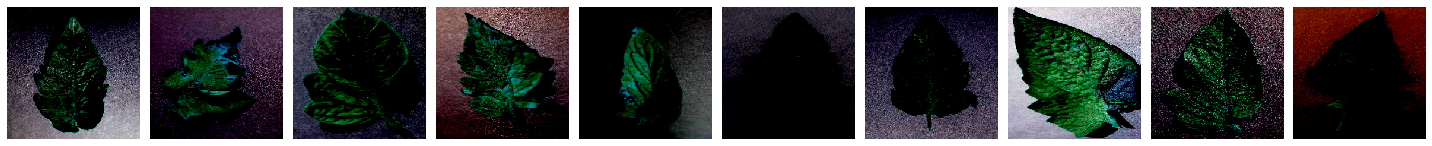

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [6]:
plotImages(imgs)
print(labels)

## 2- Model's architecture

In [7]:
# Load the mobileNet architecture from the keras api.
mobileNet_model = tf.keras.applications.mobilenet.MobileNet() 

In [8]:
mobileNet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [9]:
incomplete_model = mobileNet_model.layers[-6].output # Cut the last 6 layers from the model
# Add a dense layer to the incomplete model consisting of 10 nodes with a softmax activation to predict the propability of the 10 classes. 
output = Dense(units = 10, activation='softmax')(incomplete_model) 
TDCM = Model(inputs=mobileNet_model.input, outputs=output)

In [10]:
#freeze mobileNet's parameters except for the last 23 layers
for layer in TDCM.layers[:-23]:
    layer.trainable = False

In [11]:
TDCM.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

## 3- Model training

In [12]:
#Define the optimization algorithm , the loss function and the performance metrics of the model
TDCM.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
batch_size = 16
#Start the model training process
TDCM.fit( x = train_batches, 
          steps_per_epoch=len(train_batches)/batch_size, 
          validation_data=dev_batches,
          validation_steps=len(dev_batches)/batch_size,
          epochs=11,
          shuffle=True,
          verbose=2)

Epoch 1/11
51/50 - 33s - loss: 1.2379 - accuracy: 0.5925 - val_loss: 1.4974 - val_accuracy: 0.5446
Epoch 2/11
51/50 - 32s - loss: 0.6190 - accuracy: 0.8113 - val_loss: 1.6109 - val_accuracy: 0.5446
Epoch 3/11
51/50 - 32s - loss: 0.4377 - accuracy: 0.8762 - val_loss: 1.0776 - val_accuracy: 0.6786
Epoch 4/11
51/50 - 34s - loss: 0.3526 - accuracy: 0.8995 - val_loss: 0.4805 - val_accuracy: 0.8482
Epoch 5/11
51/50 - 33s - loss: 0.3280 - accuracy: 0.8873 - val_loss: 0.6639 - val_accuracy: 0.7857
Epoch 6/11
51/50 - 32s - loss: 0.2569 - accuracy: 0.9375 - val_loss: 0.3305 - val_accuracy: 0.9286
Epoch 7/11
51/50 - 34s - loss: 0.2349 - accuracy: 0.9289 - val_loss: 0.2236 - val_accuracy: 0.9286
Epoch 8/11
51/50 - 33s - loss: 0.2018 - accuracy: 0.9473 - val_loss: 0.2931 - val_accuracy: 0.9018
Epoch 9/11
51/50 - 32s - loss: 0.1884 - accuracy: 0.9400 - val_loss: 0.1814 - val_accuracy: 0.9196
Epoch 10/11
51/50 - 32s - loss: 0.1597 - accuracy: 0.9547 - val_loss: 0.2449 - val_accuracy: 0.9464
Epoch 11/

In [14]:
predictions = TDCM.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [22]:
'''
    Function Description: This function prints and plots the confusion matrix..
    Input: 1)Confusion matrix object
           2)True classes.
           3)Normalization Takes two values True or False.
           4)colormap.
    output: Nothing
'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
test_batches.class_indices

{'T_Bacterial_spot': 0,
 'T_Early_blight': 1,
 'T_Healthy': 2,
 'T_Late_blight': 3,
 'T_Leaf_Mold': 4,
 'T_mosaic_virus': 5,
 'T_Septoria_leaf_spot': 6,
 'T_Spider_mites_Two_spotted': 7,
 'T_Target_Spot': 8,
 'T_YellowLeaf_Curl_Virus': 9}

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[199   2   0   3   0   0   4   0   4   0]
 [  1  81   0  10   3   0   2   0   3   0]
 [  0   0 158   0   0   0   0   0   1   0]
 [  0   5   1 183   0   0   0   0   1   0]
 [  0   0   1   1  88   0   1   3   1   0]
 [  0   0   0   0   2  35   0   0   0   0]
 [  2   0   2   2   0   0 169   1   1   0]
 [  0   1   3   0   0   0   2 148  13   0]
 [  1   0   5   0   0   0   1   2 131   0]
 [  4   0   0   1   1   0   0   0   0 314]]


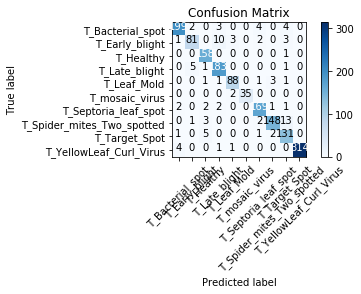

In [20]:
cm_plot_labels = ['T_Bacterial_spot', 'T_Early_blight', 'T_Healthy', 'T_Late_blight', 'T_Leaf_Mold', 'T_mosaic_virus', 'T_Septoria_leaf_spot', 'T_Spider_mites_Two_spotted', 'T_Target_Spot', 'T_YellowLeaf_Curl_Virus']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving the entire model

This save function saves:
* The architecture of the model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer).
* The state of the optimizer, allowing to resume training exactly where you left off.

In [21]:
if os.path.isfile('D:/NoteBook/G.P/Models/TDCMv1.1.h5') is False:
    TDCM.save('D:/NoteBook/G.P/Models/TDCMv1.1.h5')